In [6]:
import sklearn
import pandas
import seaborn
import matplotlib
%matplotlib inline

In [7]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [34]:
data_set = pandas.read_excel('books.xlsx')

In [35]:
data_set


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,buys_not
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,1
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,2004-01-09 00:00:00,Scholastic Inc.,1
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,2003-01-11 00:00:00,Scholastic,1
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-01-05 00:00:00,Scholastic Inc.,1
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,0
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9780140110876,eng,635,783,56,1988-01-12 00:00:00,Penguin Books,0
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9780140131963,eng,415,820,95,1993-01-08 00:00:00,Penguin Books,0
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,0


In [36]:
ds=data_set
ds.shape

(11127, 13)

In [37]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  buys_not            11127 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 739.0+ KB


In [29]:
data_set.groupby ('language_code').size()

language_code
9780674842113       1
9780851742717       1
9781563841552       1
9781593600112       1
ale                 1
ara                 1
en-CA               7
en-GB             214
en-US            1408
eng              8908
enm                 3
fre               144
ger                99
gla                 1
glg                 1
grc                11
ita                 5
jpn                46
lat                 3
msa                 1
mul                19
nl                  1
nor                 1
por                10
rus                 2
spa               218
srp                 1
swe                 2
tur                 1
wel                 1
zho                14
dtype: int64

In [38]:
ds


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,buys_not
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,1
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,2004-01-09 00:00:00,Scholastic Inc.,1
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,2003-01-11 00:00:00,Scholastic,1
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-01-05 00:00:00,Scholastic Inc.,1
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,0
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9780140110876,eng,635,783,56,1988-01-12 00:00:00,Penguin Books,0
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9780140131963,eng,415,820,95,1993-01-08 00:00:00,Penguin Books,0
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,0


In [15]:
data_set.groupby ('isbn').size()

isbn
0             1
3.58          2
3.63          1
1713191       1
2310198       1
             ..
887782719X    1
972233168X    1
981246820X    1
986114613X    1
987224975X    1
Length: 11126, dtype: int64

In [44]:
cleaned_data_set = data_set.drop (columns = ['bookID'], axis = '1')
cleaned_data_set.head ()


,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,buys_not
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,1
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,2004-01-09 00:00:00,Scholastic Inc.,1
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,2003-01-11 00:00:00,Scholastic,1
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-01-05 00:00:00,Scholastic Inc.,1
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,1


In [45]:
cleaned_data_set.describe ()

,ratings_count,text_reviews_count,buys_not
count,1.112700e+04,11127.000000,11127.000000
mean,1.793649e+04,541.864474,0.579671
std,1.124794e+05,2576.174610,0.493634
min,0.000000e+00,0.000000,0.000000
25%,1.040000e+02,9.000000,0.000000
50%,7.450000e+02,47.000000,1.000000
75%,4.993500e+03,237.500000,1.000000
max,4.597666e+06,94265.000000,1.000000


In [46]:
data_set.groupby ('buys_not').size()


buys_not
0    4677
1    6450
dtype: int64

In [47]:
cleaned_data_set.describe ()

,ratings_count,text_reviews_count,buys_not
count,1.112700e+04,11127.000000,11127.000000
mean,1.793649e+04,541.864474,0.579671
std,1.124794e+05,2576.174610,0.493634
min,0.000000e+00,0.000000,0.000000
25%,1.040000e+02,9.000000,0.000000
50%,7.450000e+02,47.000000,1.000000
75%,4.993500e+03,237.500000,1.000000
max,4.597666e+06,94265.000000,1.000000


<AxesSubplot:xlabel='buys_not', ylabel='count'>

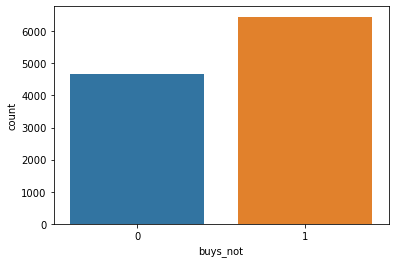

In [48]:
seaborn.countplot (x = 'buys_not', data = cleaned_data_set)

<AxesSubplot:xlabel='buys_not', ylabel='count'>

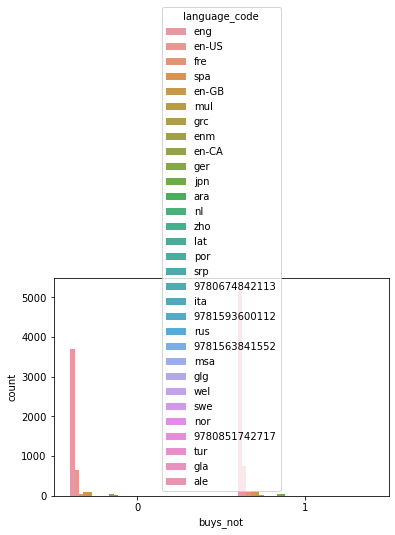

In [56]:
seaborn.countplot ( x = 'buys_not', hue = 'language_code', data = cleaned_data_set)

<AxesSubplot:>

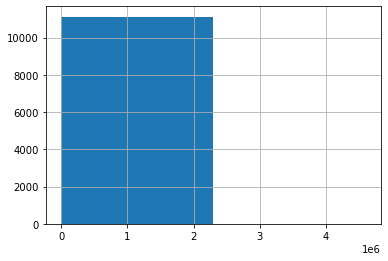

In [57]:
data_set ['ratings_count'].hist(bins = 2)

<AxesSubplot:>

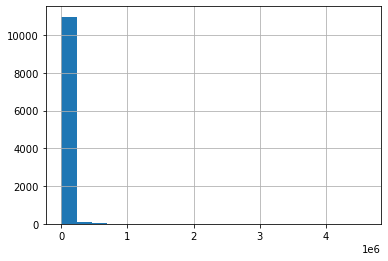

In [53]:
data_set ['ratings_count'].hist(bins = 20)